In [85]:
# import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [86]:
df = pd.read_csv(r'../Datasets/churn.csv')
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [87]:
df.isnull()   # data da null olan datalari getirir varsa true yoxdursa false verir

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [89]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

In [90]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [91]:
gender_mapping = {
    'Male': 1,
    'Female': 0
}
# Replace color names with numerical values
df['Gender'] = df['Gender'].replace(gender_mapping)

In [92]:
df['Age'].value_counts()

Age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64

In [93]:
Geography_mapping = {
    'France': 1,
    'Spain': 2,
    'Germany': 3,
}
# Replace color names with numerical values
df['Geography'] = df['Geography'].replace(Geography_mapping)

In [97]:
# dropping RowNumber,CustomerId and Surname

customer_data = df.drop(['RowNumber','CustomerId','Surname'],axis = 1)
customer_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,xlog,xpow,xsqrt,xp1,xp3,xz,xnorm,xmean
0,619,1,0,42,2,0.00,1,1,1,101348.88,1,3.761200,1764,6.480741,1.453198,9.417802,0.293503,0.324324,1.079087
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,3.737670,1681,6.403124,1.449701,9.282614,0.198154,0.310811,1.053394
2,502,1,0,42,8,159660.80,3,1,0,113931.57,1,3.761200,1764,6.480741,1.453198,9.417802,0.293503,0.324324,1.079087
3,699,1,0,39,1,0.00,2,0,0,93826.63,0,3.688879,1521,6.244998,1.442469,9.008215,0.007456,0.283784,1.002009
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,3.784190,1849,6.557439,1.456622,9.551709,0.388852,0.337838,1.104779


In [98]:
customer_data['Geography'] = customer_data['Geography'].astype("category")
customer_data['Gender'] = customer_data['Gender'].astype("category")

In [99]:
customer_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
 11  xlog             10000 non-null  float64 
 12  xpow             10000 non-null  int64   
 13  xsqrt            10000 non-null  float64 
 14  xp1              10000 non-null  float64 
 15  xp3              10000 non-null  float64 
 16  xz               10000 non-null  float64 

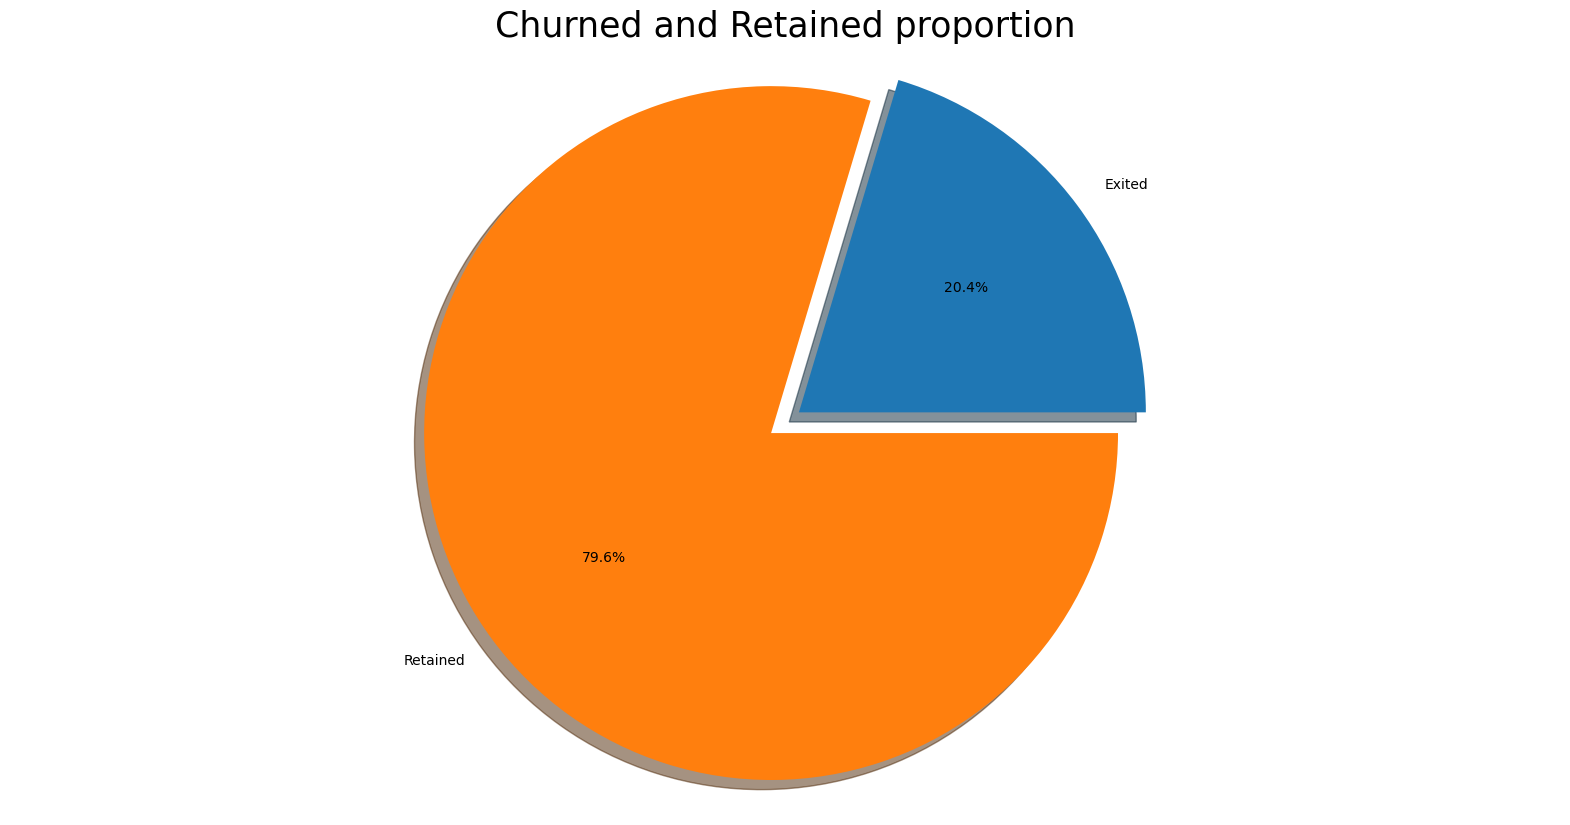

In [100]:
fig, axs = plt.subplots(figsize=(20, 10))
sizes = [customer_data.Exited[customer_data['Exited']==1].count(), customer_data.Exited[customer_data['Exited']==0].count()]
axs.pie(sizes, explode=(0, 0.1), labels=['Exited', 'Retained'], autopct='%1.1f%%',shadow=True)
axs.axis('equal')
plt.title("Churned and Retained proportion", size = 25)
plt.show()

In [94]:
df['Surname'].value_counts()

Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64

In [95]:
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0


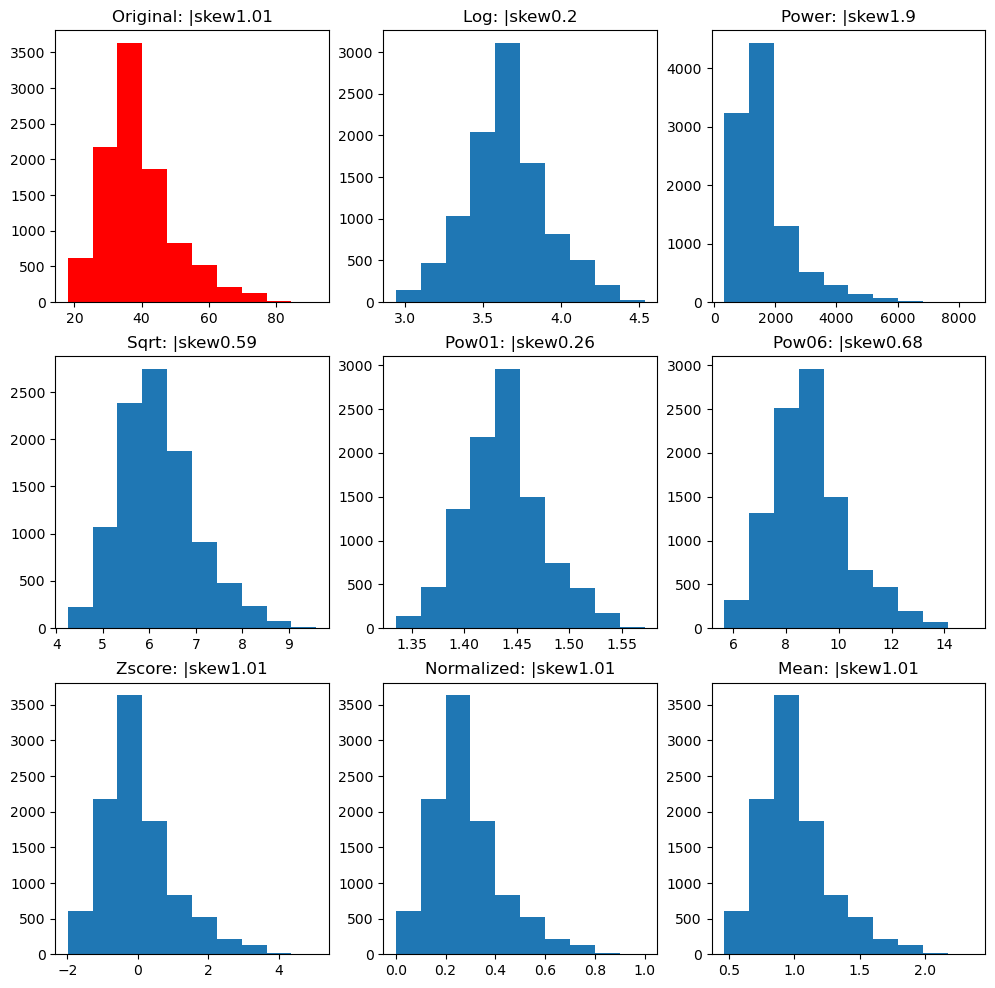

In [96]:
target = 'Age'
fig, (ax1, ax2, ax3) = plt.subplots(3, 3, figsize=(12,12))
df['xlog'] = np.log(df[target] + 1)
df['xpow'] = np.power(df[target], 2)
df['xsqrt'] = np.sqrt(df[target])
df['xp1'] = np.power(df[target], 0.1)
df['xp3'] = np.power(df[target], 0.6)
df['xz'] = (df[target] - df[target].mean()) / df[target].std()
df['xnorm'] = (df[target] - df[target].min()) / (df[target].max() - df[target].min())
df['xmean'] = (df[target] / df[target].mean())
ax1[0].hist(df[target], color='red')
ax1[1].hist(df['xlog'])
ax1[2].hist(df['xpow'])
ax2[0].hist(df['xsqrt'])
ax2[1].hist(df['xp1'])
ax2[2].hist(df['xp3'])
ax3[0].hist(df['xz'])
ax3[1].hist(df['xnorm'])
ax3[2].hist(df['xmean'])
ax1[0].set_title(f'Original: |skew{round(df[target].skew(), 2)}')
ax1[1].set_title(f'Log: |skew{round(df["xlog"].skew(), 2)}')
ax1[2].set_title(f'Power: |skew{round(df["xpow"].skew(), 2)}')
ax2[0].set_title(f'Sqrt: |skew{round(df["xsqrt"].skew(), 2)}')
ax2[1].set_title(f'Pow01: |skew{round(df["xp1"].skew(), 2)}')
ax2[2].set_title(f'Pow06: |skew{round(df["xp3"].skew(), 2)}')
ax3[0].set_title(f'Zscore: |skew{round(df["xz"].skew(), 2)}')
ax3[1].set_title(f'Normalized: |skew{round(df["xnorm"].skew(), 2)}')
ax3[2].set_title(f'Mean: |skew{round(df["xmean"].skew(), 2)}')
plt.show()

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

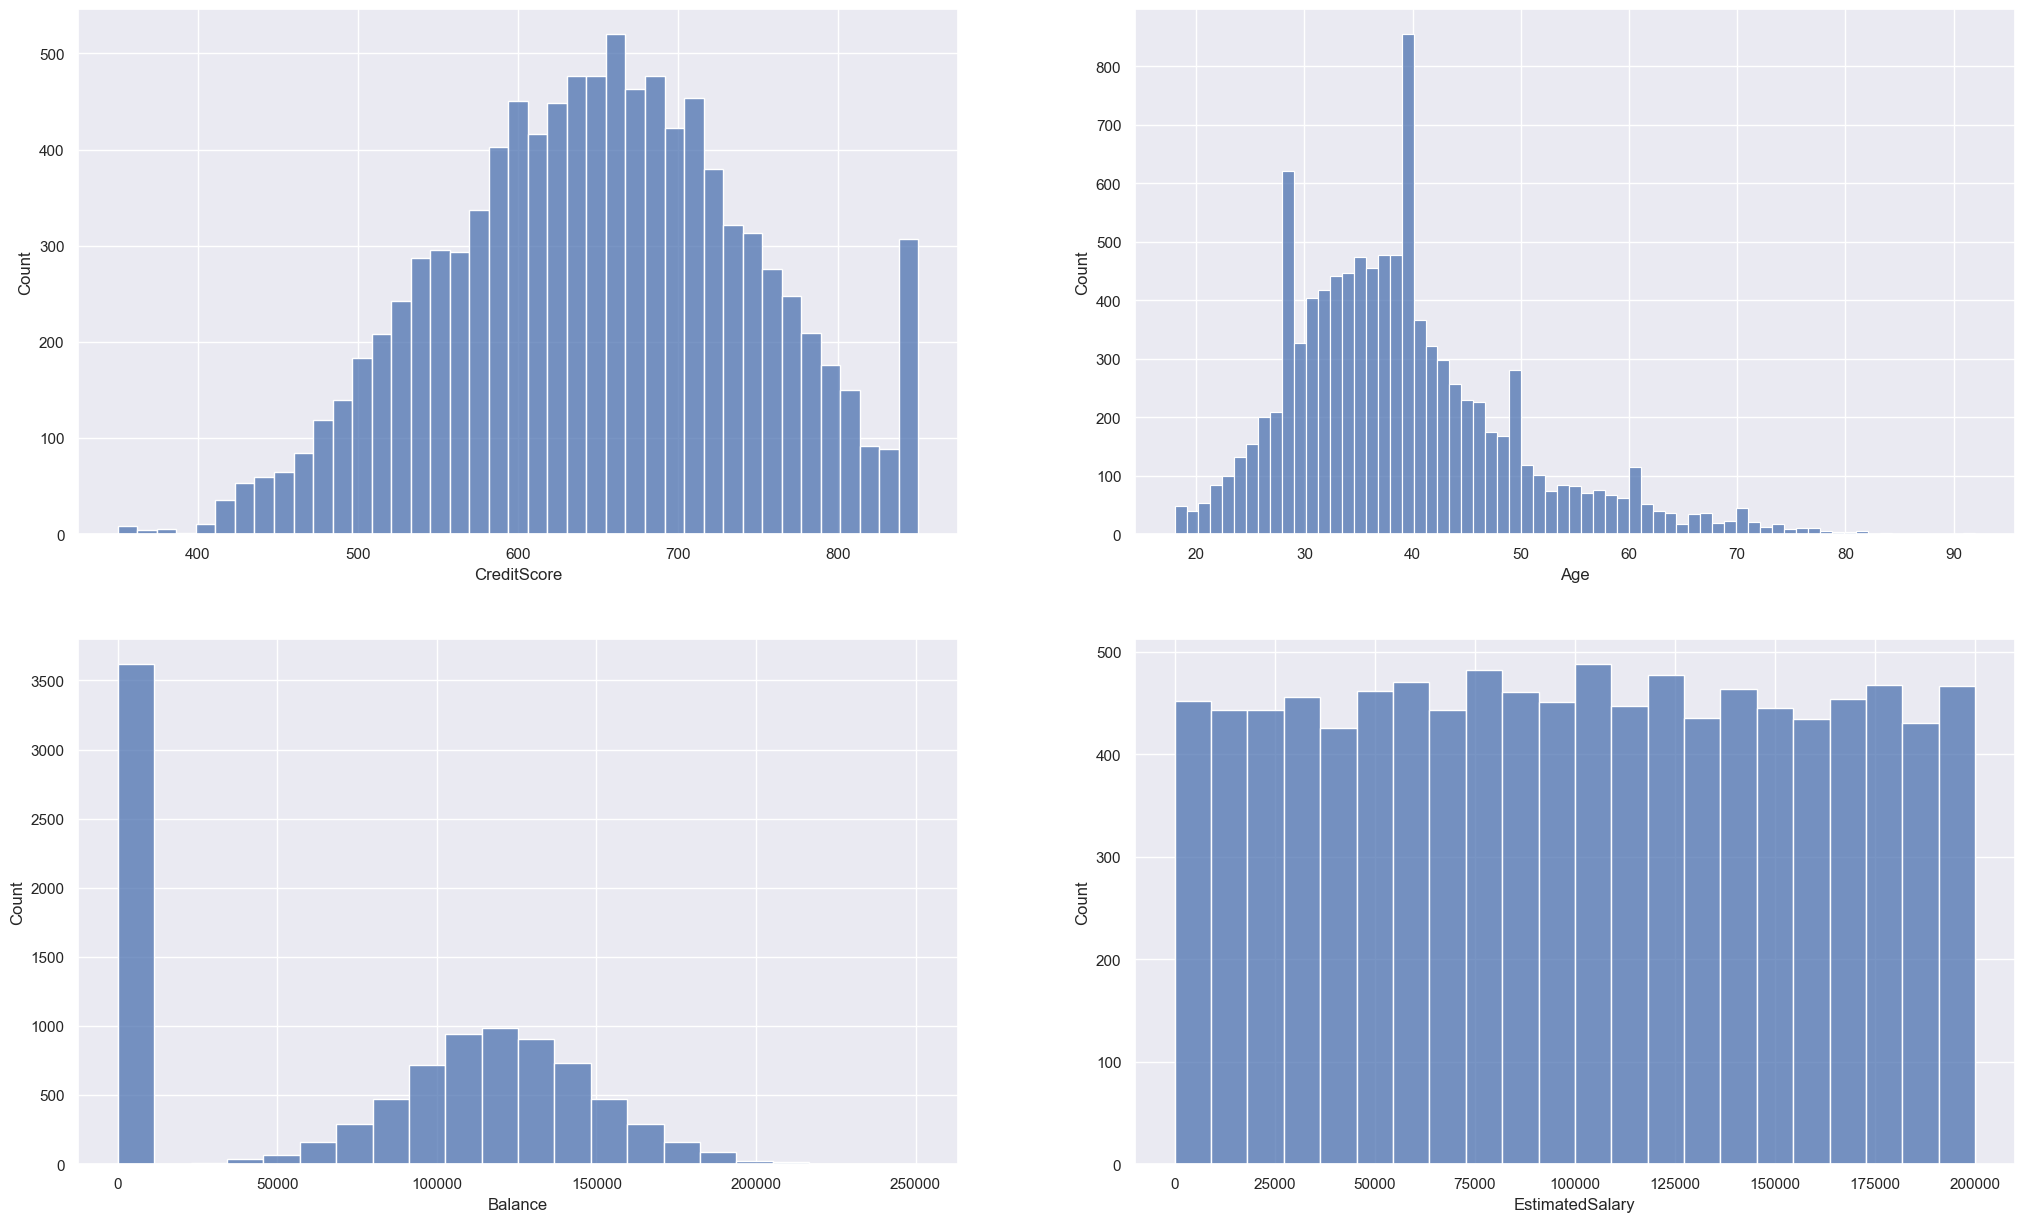

In [101]:
# Let's visualize the CreditScore distribution

sns.set(rc={'figure.figsize':(25,15)})
fig,axs = plt.subplots(2,2)
sns.set_theme(palette="crest_r")
sns.histplot(data = customer_data,x = "CreditScore",ax=axs[0,0])
sns.histplot(data = customer_data,x = "Age",ax=axs[0,1])
sns.histplot(data = customer_data,x = "Balance",ax=axs[1,0])
sns.histplot(data = customer_data,x = "EstimatedSalary",ax=axs[1,1])

<Axes: >

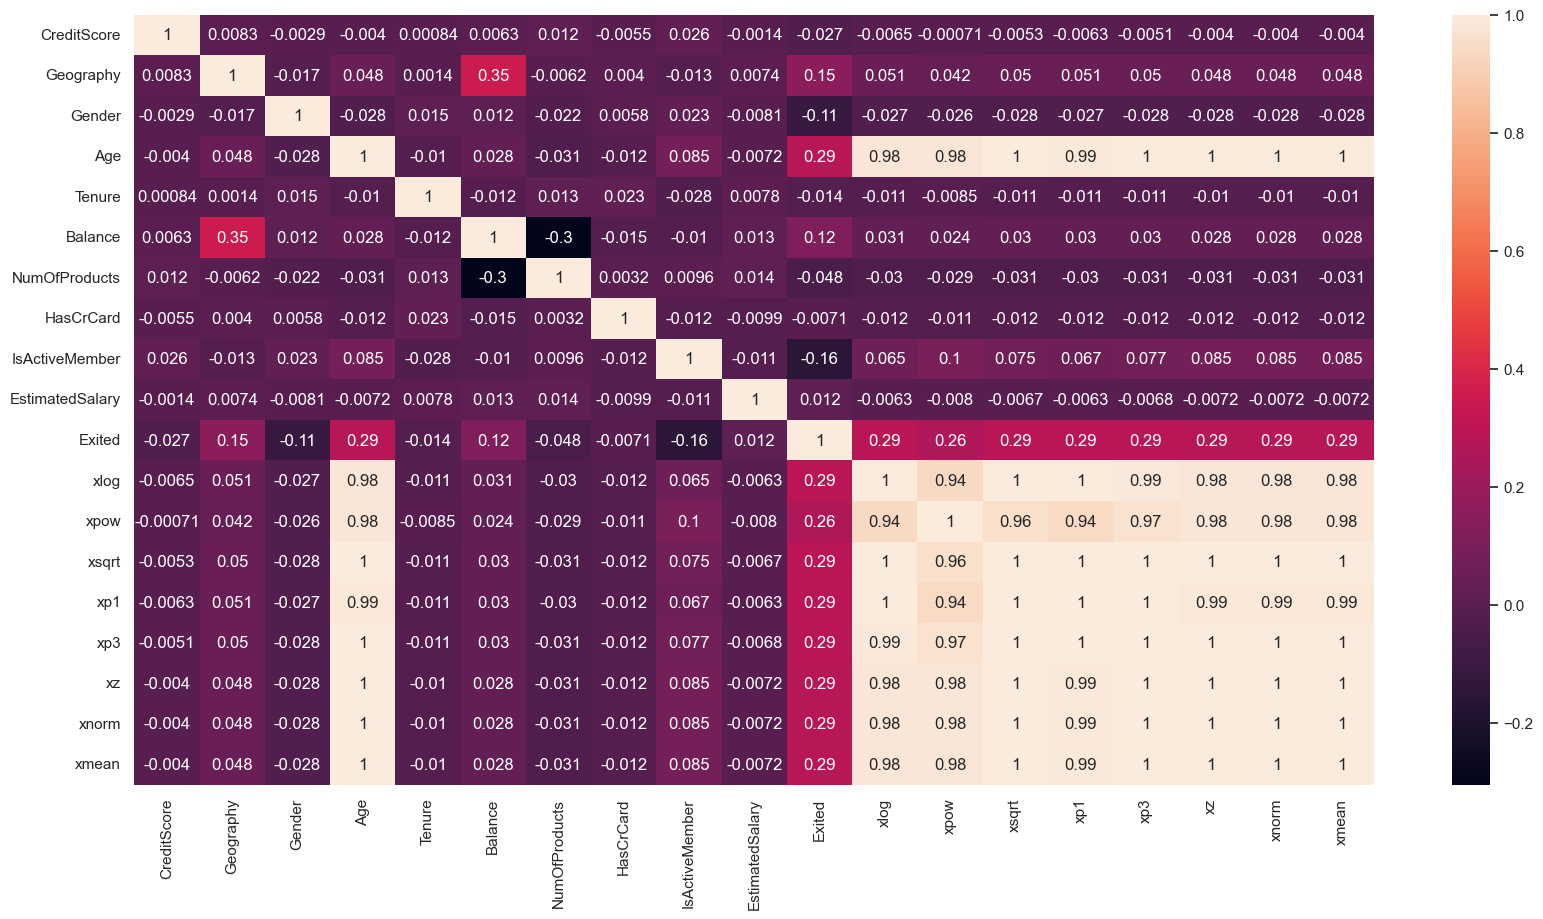

In [102]:
# let's check correlation between all numerical columns

sns.set(rc={'figure.figsize':(20,10)})
corr = customer_data.corr()
sns.heatmap(corr,annot=True)

<Axes: xlabel='Exited', ylabel='Tenure'>

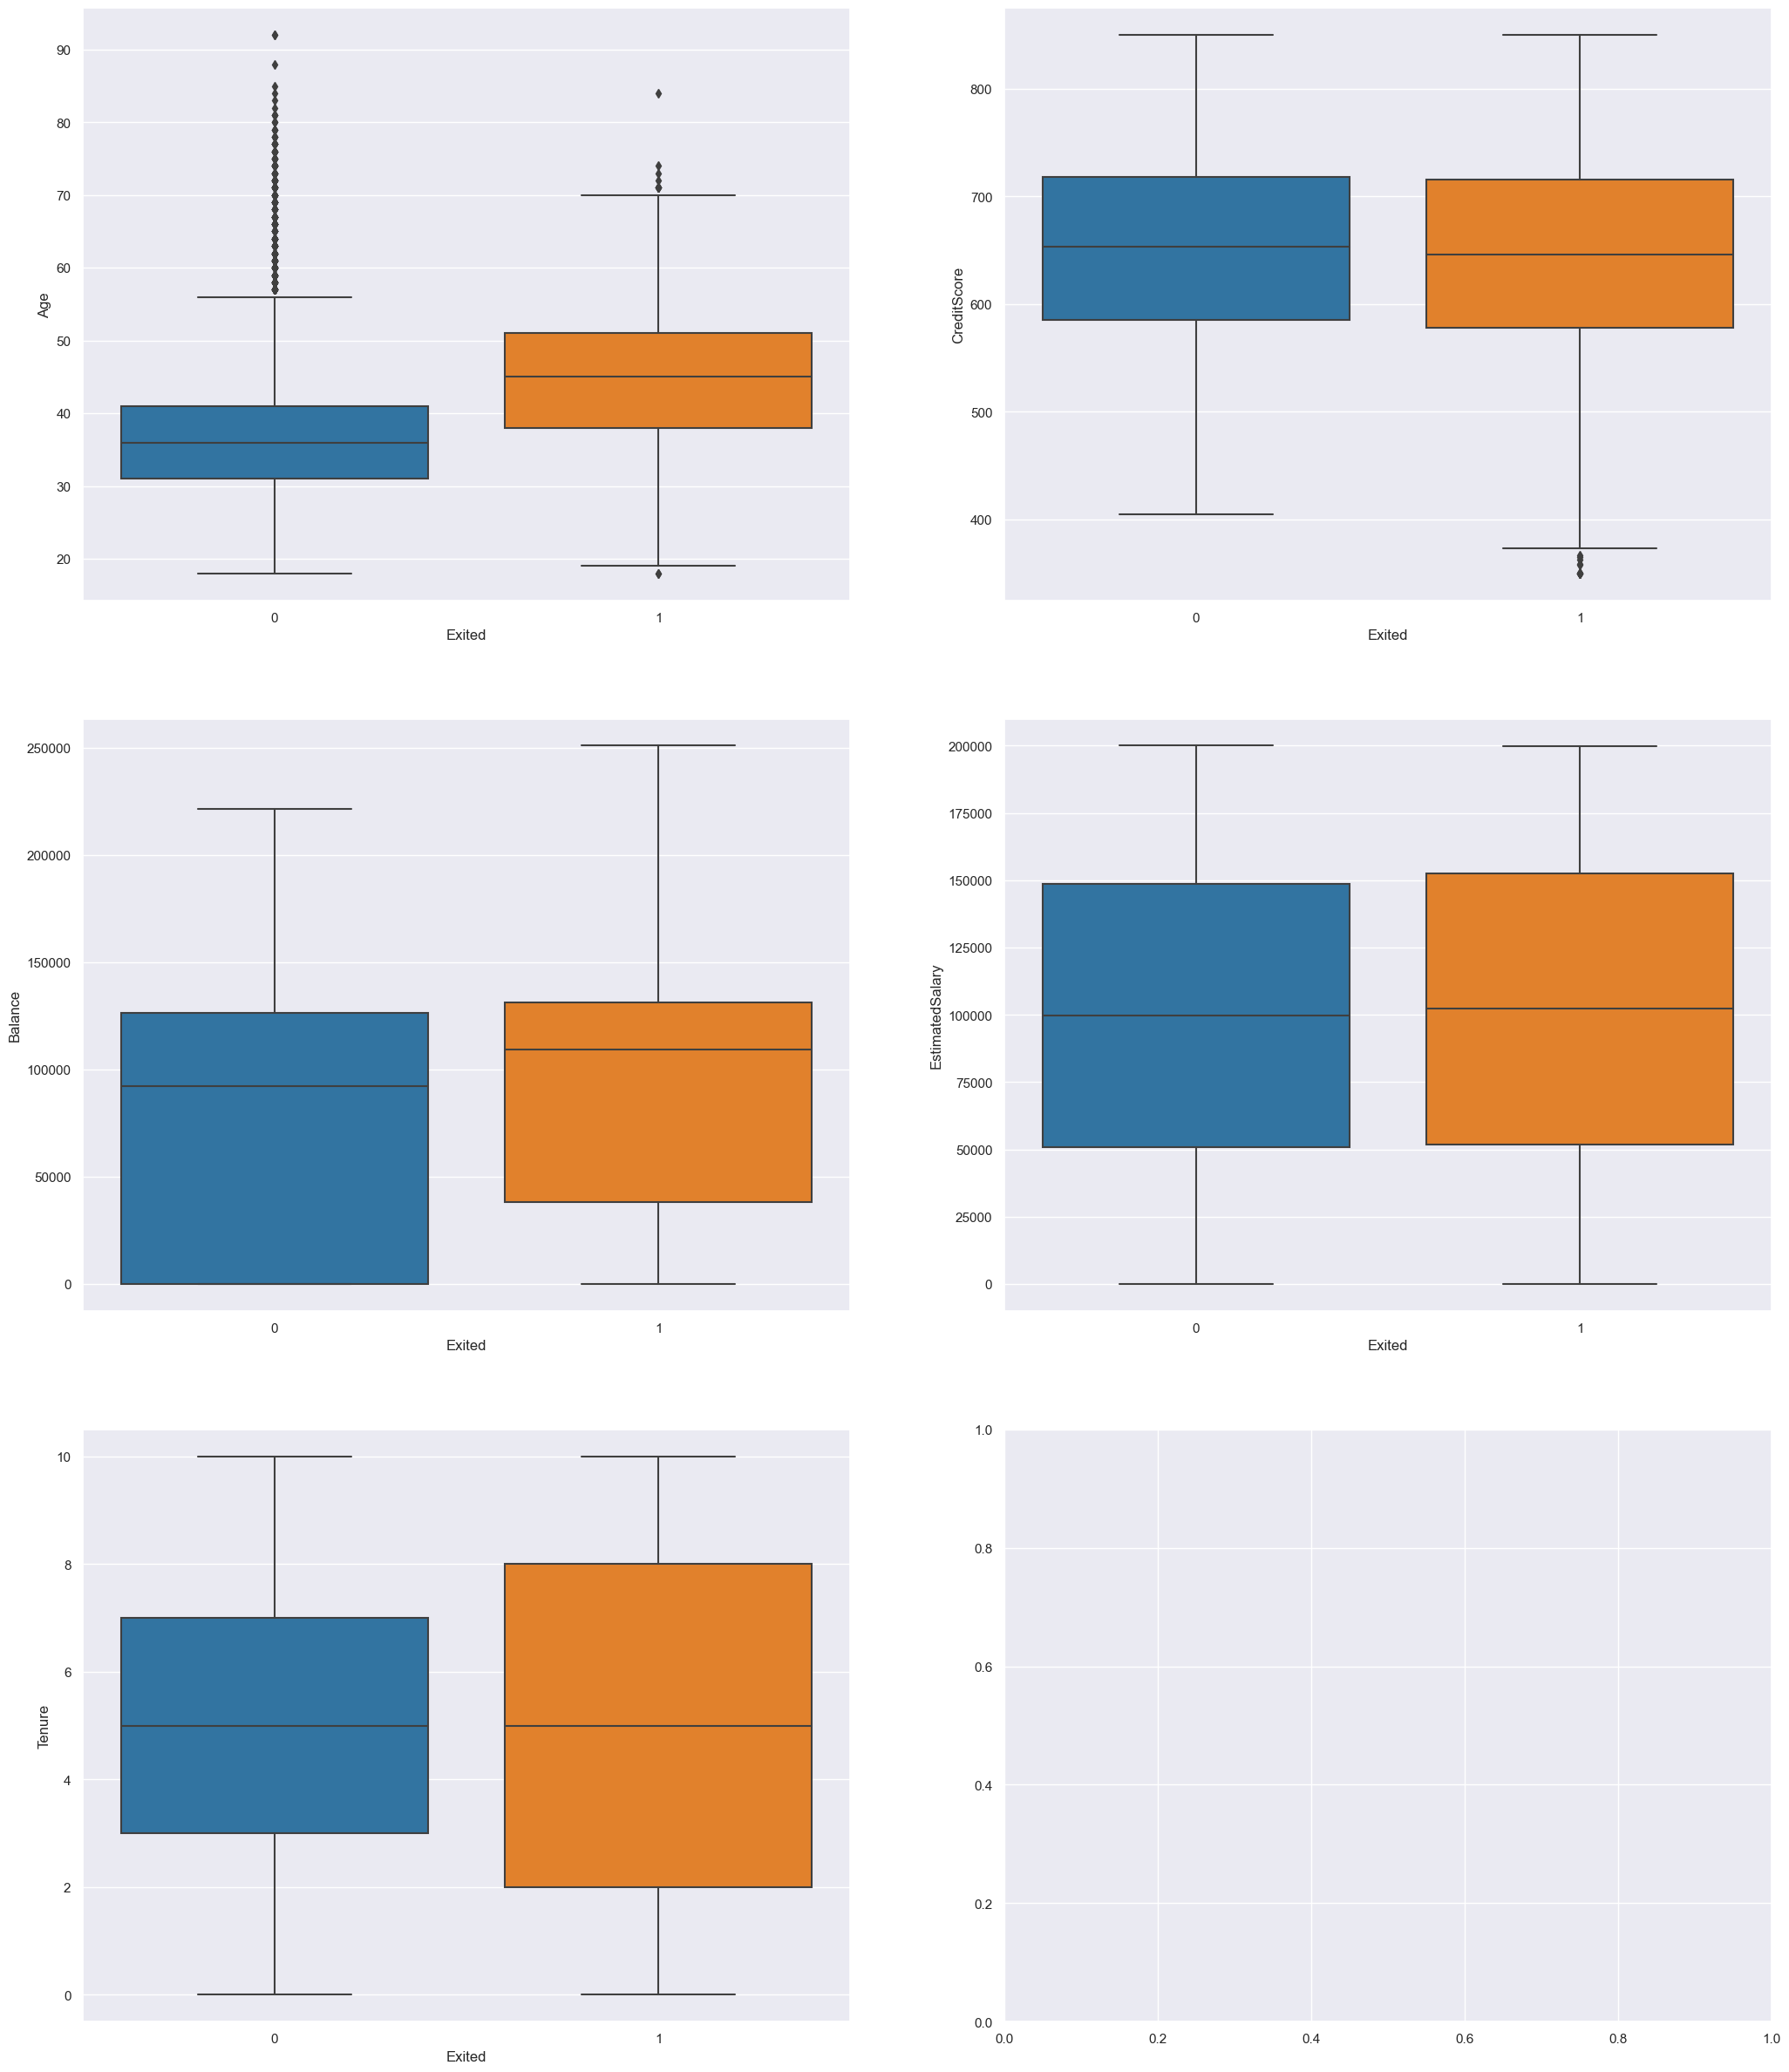

In [103]:
# let explore all the continuous variable with respect to our Exit status

sns.set(rc={'figure.figsize':(25,30)})
fig,axs = plt.subplots(3,2)
sns.set_theme(palette="tab10")
sns.boxplot(data = customer_data,x = "Exited",y = "Age",ax = axs[0,0])
sns.boxplot(data = customer_data,x = "Exited",y = "CreditScore",ax = axs[0,1])
sns.boxplot(data = customer_data,x = "Exited",y = "Balance",ax = axs[1,0])
sns.boxplot(data = customer_data,x = "Exited",y = "EstimatedSalary",ax = axs[1,1])
sns.boxplot(data = customer_data,x = "Exited",y = "Tenure",ax=axs[2,0])